In [32]:
#setting up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import missingno as msno
import kagglehub

%matplotlib inline
# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")
df = pd.read_csv(path + '/hotel_bookings.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [33]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")
df.info()

hotel: 2
is_canceled: 2
lead_time: 479
arrival_date_year: 3
arrival_date_month: 12
arrival_date_week_number: 53
arrival_date_day_of_month: 31
stays_in_weekend_nights: 17
stays_in_week_nights: 35
adults: 14
children: 5
babies: 5
meal: 5
country: 177
market_segment: 8
distribution_channel: 5
is_repeated_guest: 2
previous_cancellations: 15
previous_bookings_not_canceled: 73
reserved_room_type: 10
assigned_room_type: 12
booking_changes: 21
deposit_type: 3
agent: 333
company: 352
days_in_waiting_list: 128
customer_type: 4
adr: 8879
required_car_parking_spaces: 5
total_of_special_requests: 6
reservation_status: 3
reservation_status_date: 926
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64

In [34]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: >

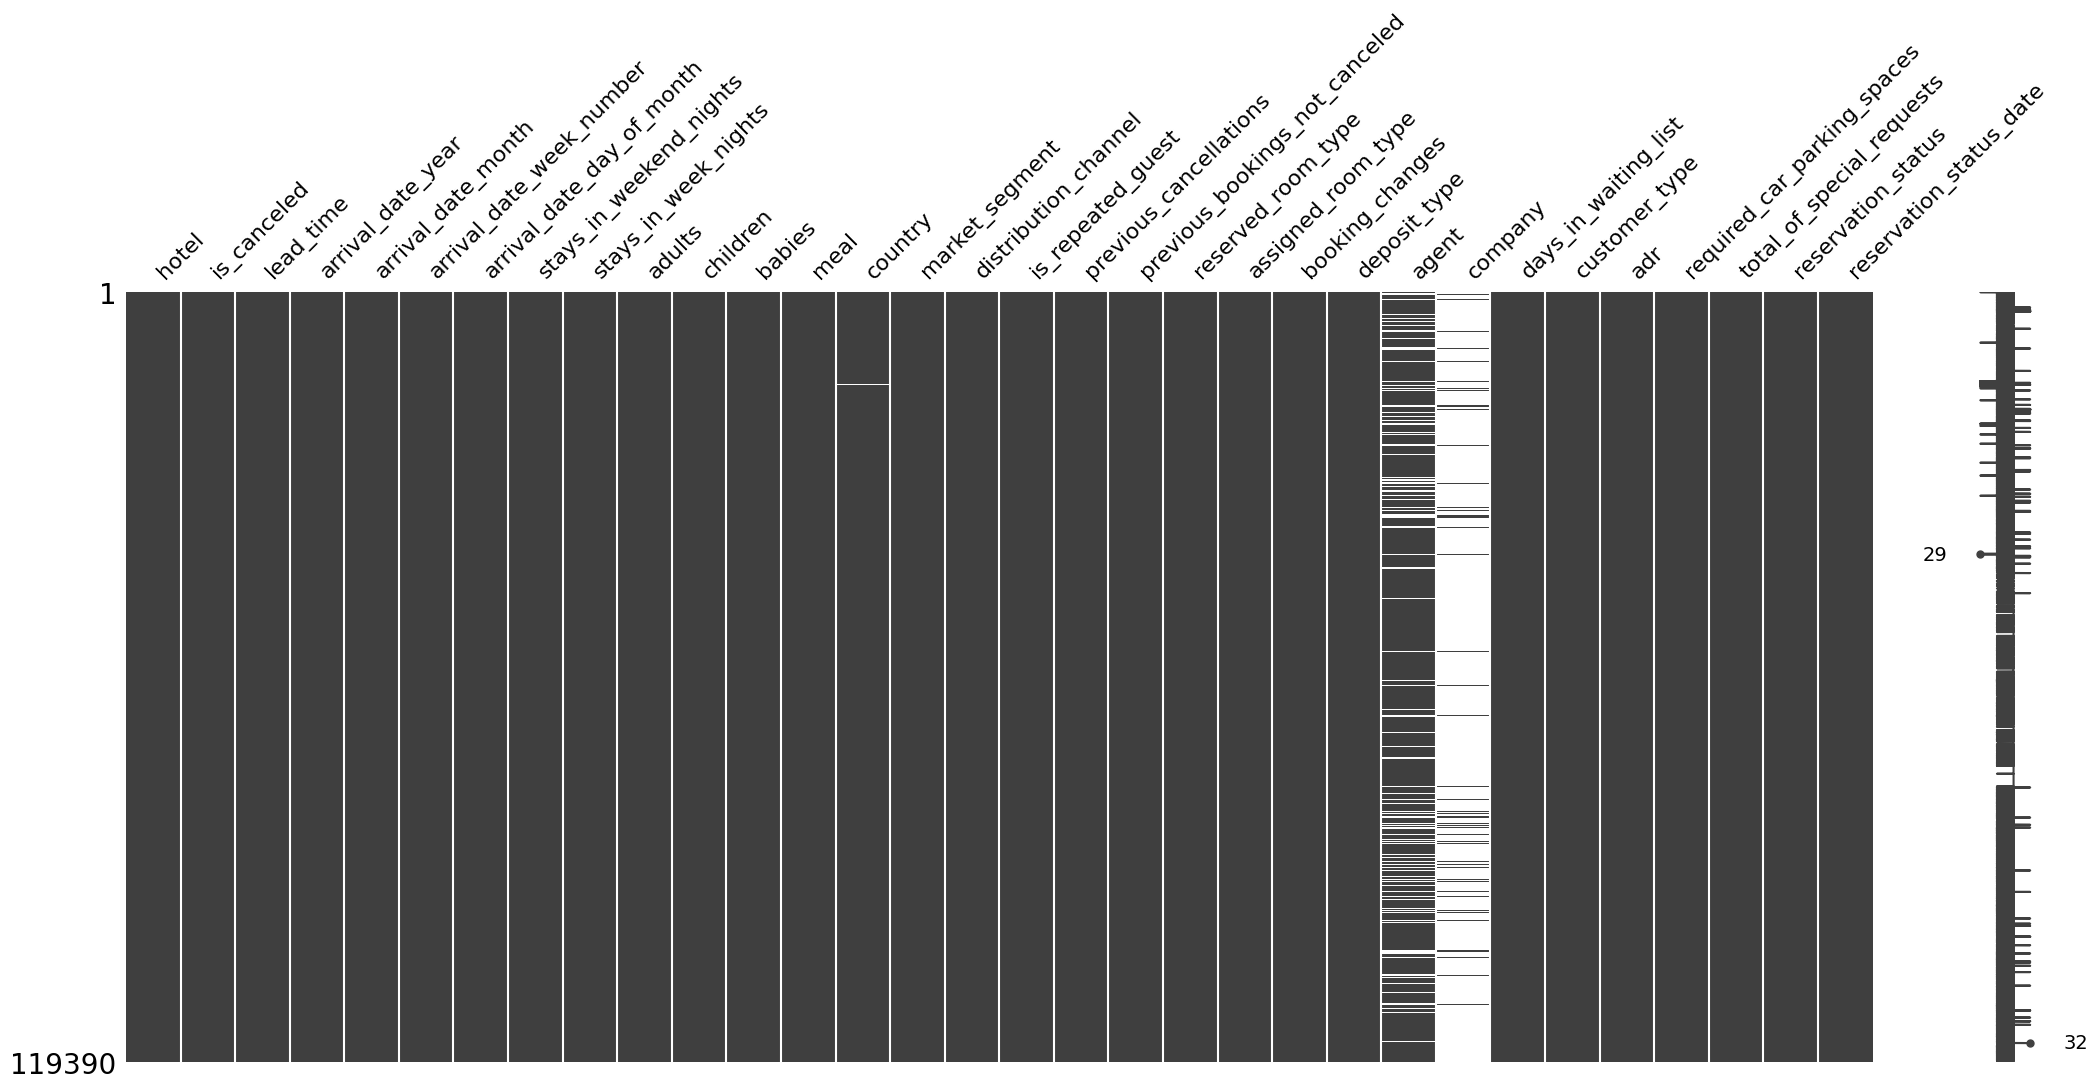

In [35]:
msno.matrix(df)

In [36]:
df['children'] = df['children'].fillna(0)
# Remove rows where there are no guests 

df = df.query('not (children == 0 and adults == 0 and babies == 0)')

In [37]:
 df_class = df.copy()
 (df == 'A').any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                 True
assigned_room_type                 True
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


In [38]:
from sklearn.preprocessing import LabelEncoder
le_hotel = LabelEncoder()
le_month = LabelEncoder()
le_meal = LabelEncoder()
le_country = LabelEncoder()
le_market = LabelEncoder()
le_dist = LabelEncoder()
le_res = LabelEncoder()
le_ass = LabelEncoder()
le_deposit = LabelEncoder()
le_custt = LabelEncoder()
le_cancel = LabelEncoder()
le_reserve = LabelEncoder()

df_class['hotel'] = le_hotel.fit_transform(df_class['hotel'])
df_class['arrival_date_month'] = le_month.fit_transform(df_class['arrival_date_month'])
df_class['meal'] = le_meal.fit_transform(df_class['meal'])
df_class['country'] = le_country.fit_transform(df_class['country'])
df_class['market_segment'] = le_market.fit_transform(df_class['market_segment'])
df_class['distribution_channel'] = le_dist.fit_transform(df_class['distribution_channel'])
df_class['reserved_room_type'] = le_res.fit_transform(df_class['reserved_room_type'])
df_class['assigned_room_type'] = le_ass.fit_transform(df_class['assigned_room_type'])
df_class['deposit_type'] = le_deposit.fit_transform(df_class['deposit_type'])
df_class['customer_type'] = le_custt.fit_transform(df_class['customer_type'])
df_class['reservation_status'] = le_cancel.fit_transform(df_class['reservation_status'])
df_class['reservation_status_date'] = le_reserve.fit_transform(df_class['reservation_status_date'])

In [39]:
#random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

known_data = df_class[df_class['agent'].notnull()]
miss_data = df_class[df_class['agent'].isnull()]

X = known_data.drop(columns = ['agent'])
y = known_data['agent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 36)

model = RandomForestClassifier(n_estimators = 100, random_state=36)
model.fit(X_train, y_train)

X_miss = miss_data.drop(columns = ['agent'])
agent_pred = model.predict(X_miss)

df_class.loc[miss_data.index,'agent'] = agent_pred

In [40]:
df_class['agent'].isnull().sum()

np.int64(0)

In [41]:
#splitting data into known(notnull) and miss (isnull)
known_data1 = df_class[df_class['company'].notnull()]
miss_data1 = df_class[df_class['company'].isnull()]

#splitting known data in X and y to fit
X = known_data1.drop(columns = ['company'])
y = known_data1['company']

#split known data to train and test to fit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

#create model and fit
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 100, random_state =40)
model1.fit(X_train, y_train)

#to predict missing data
x_miss1 = miss_data1.drop(columns = ['company'])
comp_pred = model1.predict(x_miss1)

#put it back to df_class
df_class.loc[miss_data1.index,'company'] = comp_pred

In [42]:
df_class['company'].isna().sum()

np.int64(0)

In [43]:
df_class.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [44]:
#rename new column
df_class = df_class.rename(columns = {'agent':'clean agent', 'company': 'clean company'})
df_class.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,clean agent,clean company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,250.0,223.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,0,250.0,223.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,250.0,59.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,304.0,110.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,240.0,240.0,0,2,98.0,0,1,1,123
5,1,0,14,2015,5,27,1,0,2,2,...,0,240.0,240.0,0,2,98.0,0,1,1,123
6,1,0,0,2015,5,27,1,0,2,2,...,0,250.0,110.0,0,2,107.0,0,0,1,123
7,1,0,9,2015,5,27,1,0,2,2,...,0,303.0,110.0,0,2,103.0,0,1,1,123
8,1,1,85,2015,5,27,1,0,3,2,...,0,240.0,240.0,0,2,82.0,0,1,0,72
9,1,1,75,2015,5,27,1,0,3,2,...,0,15.0,9.0,0,2,105.5,0,0,0,61


In [45]:
#concat df and df_class columns: agent and company
cleaned_df = pd.concat([df, df_class['clean agent']], axis=1)
cleaned_df = pd.concat([cleaned_df, df_class['clean company']], axis=1)

In [46]:
cleaned_df = cleaned_df.drop(columns = ['agent', 'company'])
cleaned_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,clean agent,clean company
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,250.0,223.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,250.0,223.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,250.0,59.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,304.0,110.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,240.0,240.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,240.0,240.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,250.0,110.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,303.0,110.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,240.0,240.0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,15.0,9.0


In [47]:
cleaned_df.duplicated().sum()

np.int64(31989)

In [48]:
cleaned_df = cleaned_df.drop_duplicates(keep = 'last')

In [49]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87221 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87221 non-null  object 
 1   is_canceled                     87221 non-null  int64  
 2   lead_time                       87221 non-null  int64  
 3   arrival_date_year               87221 non-null  int64  
 4   arrival_date_month              87221 non-null  object 
 5   arrival_date_week_number        87221 non-null  int64  
 6   arrival_date_day_of_month       87221 non-null  int64  
 7   stays_in_weekend_nights         87221 non-null  int64  
 8   stays_in_week_nights            87221 non-null  int64  
 9   adults                          87221 non-null  int64  
 10  children                        87221 non-null  float64
 11  babies                          87221 non-null  int64  
 12  meal                            8722

In [50]:
cleaned_df.shape

(87221, 32)

In [51]:
print(cleaned_df.isnull().sum())
print("Duplicated data :",cleaned_df.duplicated().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           447
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

<Axes: >

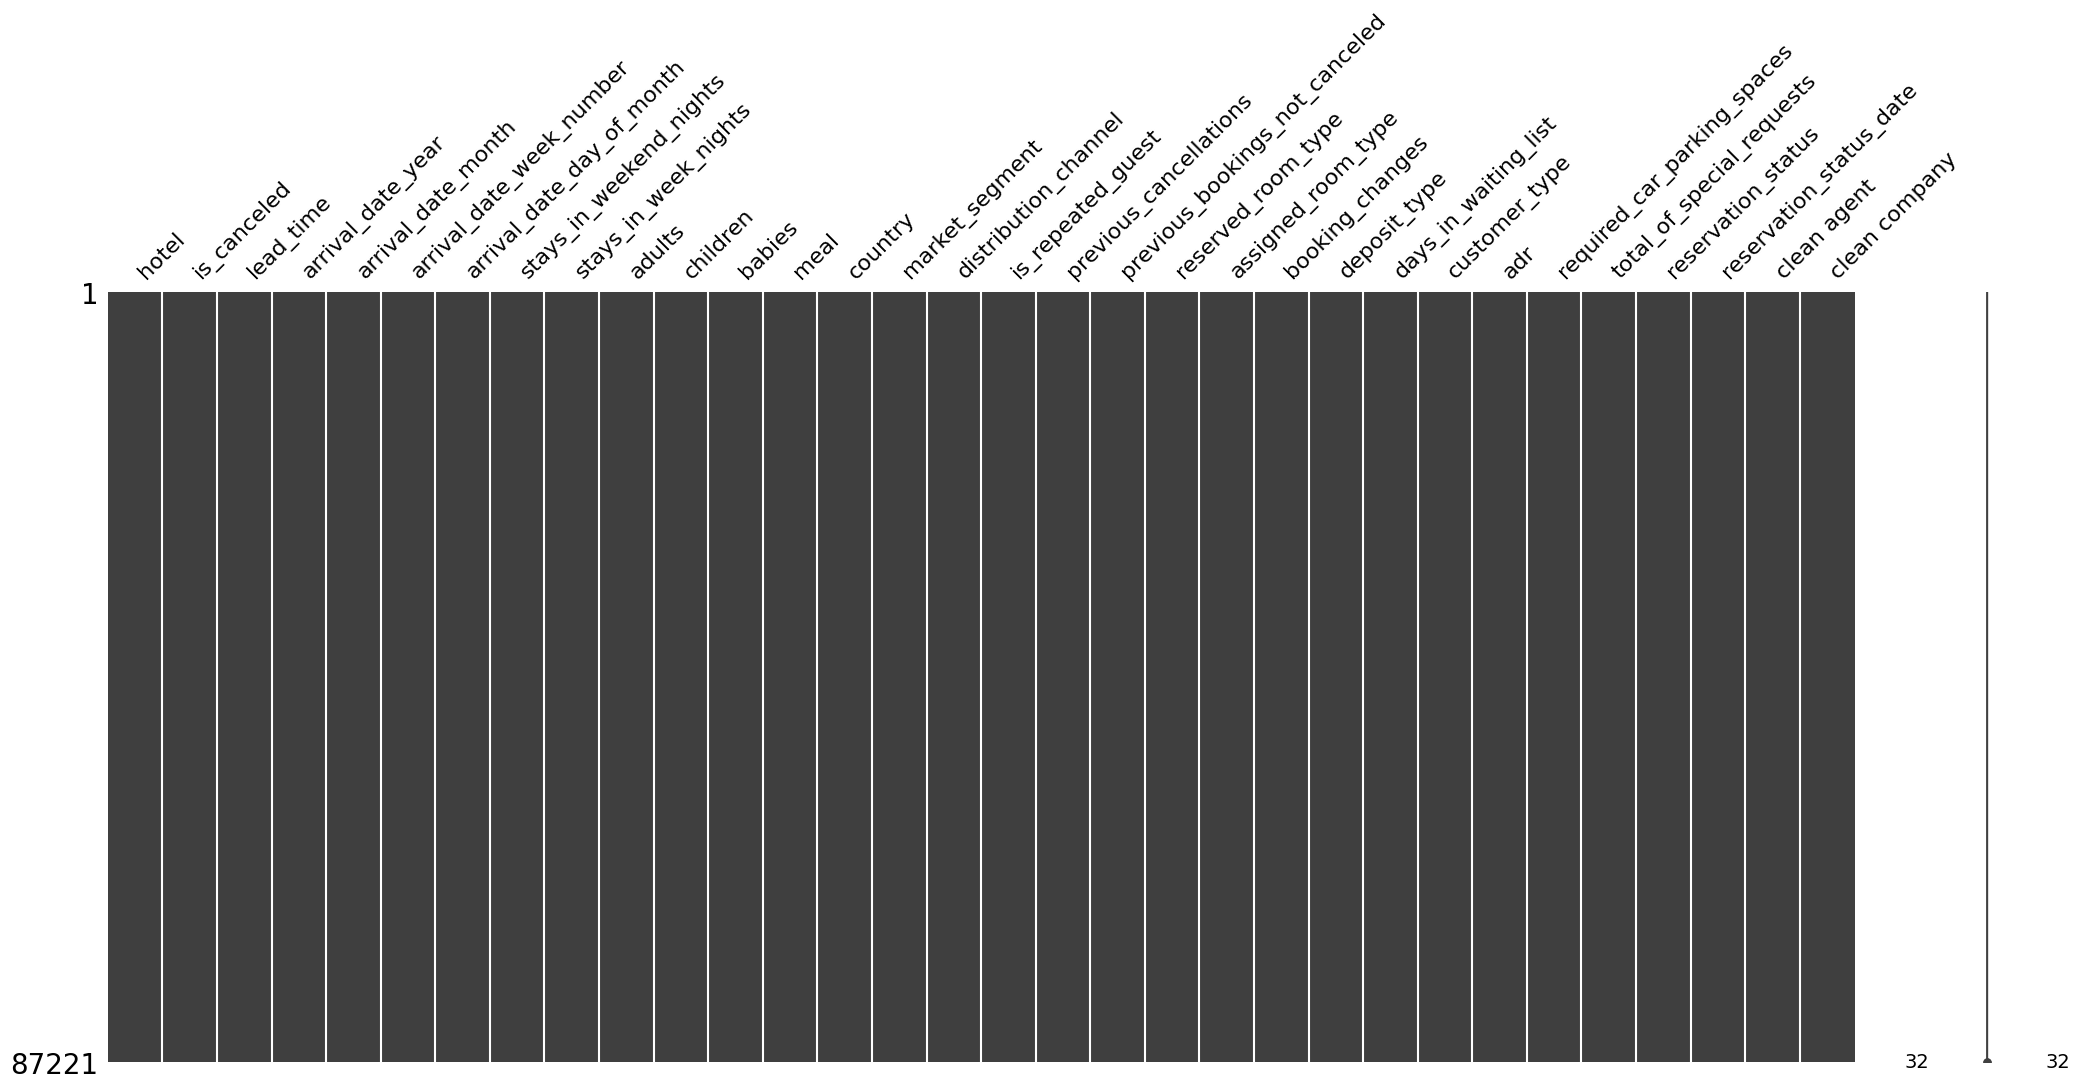

In [52]:
cleaned_df['country'] = cleaned_df['country'].fillna("Unknown")
msno.matrix(cleaned_df)

hotel                            -0.072236
is_canceled                       1.000000
lead_time                         0.184474
arrival_date_year                 0.088057
arrival_date_month               -0.044254
arrival_date_week_number          0.001656
arrival_date_day_of_month         0.005422
stays_in_weekend_nights           0.060954
stays_in_week_nights              0.084123
adults                            0.080243
children                          0.067164
babies                           -0.020634
meal                              0.046026
country                           0.091763
market_segment                    0.182100
distribution_channel              0.150404
is_repeated_guest                -0.088779
previous_cancellations            0.051496
previous_bookings_not_canceled   -0.052185
reserved_room_type                0.047482
assigned_room_type               -0.060924
booking_changes                  -0.093254
deposit_type                      0.137536
days_in_wai

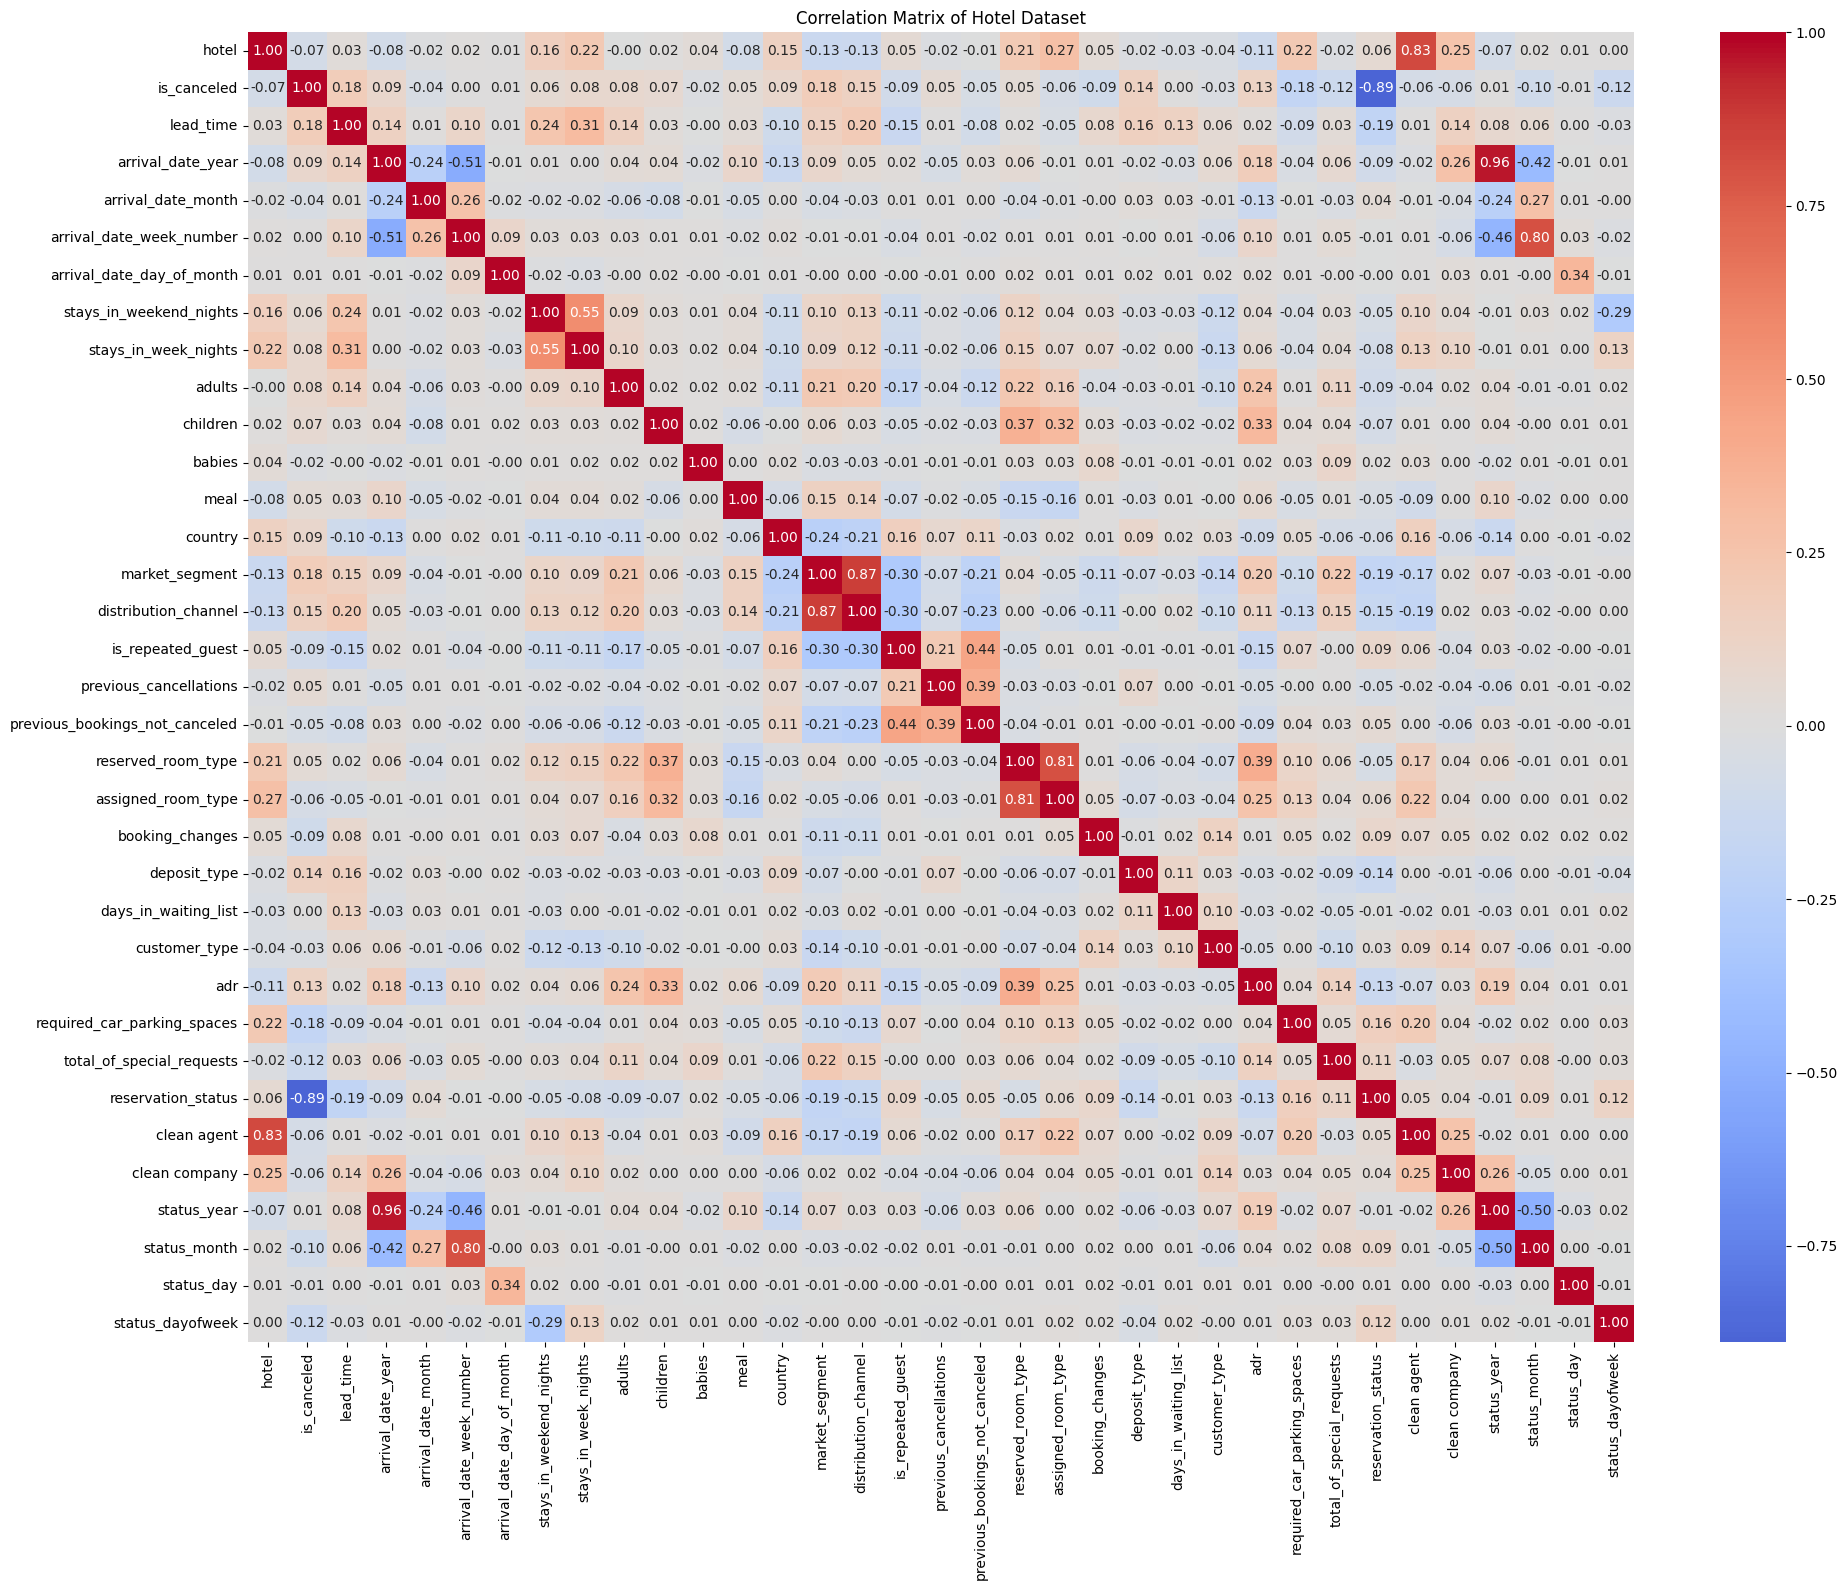

In [55]:

df = cleaned_df.copy()

# Binary encoding for hotel (0 for 'City Hotel', 1 for 'Resort Hotel')
df['hotel'] = (df['hotel'] == 'Resort Hotel').astype(int)

# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['country', 'meal', 'market_segment', 'distribution_channel',
                      'reserved_room_type', 'assigned_room_type', 'deposit_type',
                      'customer_type', 'reservation_status', 'arrival_date_month']

# Create a dictionary to store the encoders
encoders = {}

# Encode each categorical column
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
    

# Convert reservation_status_date to datetime and extract useful features
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['status_year'] = df['reservation_status_date'].dt.year
df['status_month'] = df['reservation_status_date'].dt.month
df['status_day'] = df['reservation_status_date'].dt.day
df['status_dayofweek'] = df['reservation_status_date'].dt.dayofweek

# Drop the original date column
df = df.drop('reservation_status_date', axis=1)



 # Now create the correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix['is_canceled'])

# Create a larger figure size for better readability
plt.figure(figsize=(20, 16))

# Create heatmap
seaborn.heatmap(correlation_matrix, 
                annot=True,          
                cmap='coolwarm',     
                center=0,            
                fmt='.2f')           

plt.title('Correlation Matrix of Hotel Dataset')
plt.tight_layout()

useless_col = ['status_year', 'status_day', 'arrival_date_month', 'arrival_date_year', 'arrival_date_week_number',
               'reservation_status', 'country', 'days_in_waiting_list']
df = df.drop(columns=useless_col)   

In [56]:
df.to_csv('cleaned_hotel_data.csv', index=False)